In [0]:
from google.colab import files
import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
uploaded = files.upload()

Saving Bank loan data.csv to Bank loan data.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Bank loan data.csv']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
data = df.drop(['Loan_ID','CoapplicantIncome','Married','Dependents','LoanAmount','Loan_Amount_Term','Property_Area'] , axis=1)

In [0]:
data.head()

,Gender,Education,Self_Employed,ApplicantIncome,Credit_History,Loan_Status
0,Male,Graduate,No,5849,1.0,Y
1,Male,Graduate,No,4583,1.0,N
2,Male,Graduate,Yes,3000,1.0,Y
3,Male,Not Graduate,No,2583,1.0,Y
4,Male,Graduate,No,6000,1.0,Y


In [0]:
#X = data.iloc[:,:-1]    # (Loan_ID,	Gender,	Education,	Self_Employed,	ApplicantIncome,	Credit_History,	Property_Area,	Loan_Status)
#y = data.iloc[:,-1]     # Loan Status

In [0]:
data.isnull().sum()

Gender             13
Education           0
Self_Employed      32
ApplicantIncome     0
Credit_History     50
Loan_Status         0
dtype: int64

In [0]:
data['Gender'].fillna('Male',inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data['Credit_History'].fillna(1.0, inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [0]:


label_enc_X = LabelEncoder()
data_col = ['Gender',	'Education',	'Self_Employed',	'Loan_Status']

for i in data_col:
  data[i] = label_enc_X.fit_transform(data[i])



#data.drop(['Property_Area'], axis=1, inplace=True)


data

,Gender,Education,Self_Employed,ApplicantIncome,Credit_History,Loan_Status
0,1,0,0,5849,1.0,1
1,1,0,0,4583,1.0,0
2,1,0,1,3000,1.0,1
3,1,1,0,2583,1.0,1
4,1,0,0,6000,1.0,1
...,...,...,...,...,...,...
609,0,0,0,2900,1.0,1
610,1,0,0,4106,1.0,1
611,1,0,0,8072,1.0,1
612,1,0,0,7583,1.0,1


In [0]:
X = data.iloc[:,:-1].values   # (	Gender,	Education,	Self_Employed,	ApplicantIncome,	Credit_History)

y = data.iloc[:,-1].values   # Loan Status

In [0]:
y



array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test

array([[-2.17009270e+00, -5.05721737e-01, -4.00944511e-01,
        -3.00687369e-01,  4.07763147e-01],
       [ 4.60809808e-01, -5.05721737e-01, -4.00944511e-01,
        -2.17477655e-01,  4.07763147e-01],
       [ 4.60809808e-01, -5.05721737e-01,  2.49411071e+00,
        -3.52558360e-01,  4.07763147e-01],
       [-2.17009270e+00, -5.05721737e-01, -4.00944511e-01,
        -2.75832520e-01,  4.07763147e-01],
       [ 4.60809808e-01,  1.97737199e+00, -4.00944511e-01,
         1.55653846e-01,  4.07763147e-01],
       [ 4.60809808e-01, -5.05721737e-01, -4.00944511e-01,
        -4.32371759e-01,  4.07763147e-01],
       [-2.17009270e+00, -5.05721737e-01, -4.00944511e-01,
        -4.97364875e-01,  4.07763147e-01],
       [ 4.60809808e-01,  1.97737199e+00,  2.49411071e+00,
        -4.61703569e-01, -2.45240407e+00],
       [-2.17009270e+00,  1.97737199e+00, -4.00944511e-01,
        -1.53410807e-01,  4.07763147e-01],
       [ 4.60809808e-01, -5.05721737e-01, -4.00944511e-01,
        -3.90072201e-01

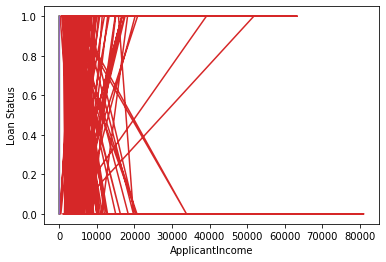

In [0]:

plt.plot(X,y)
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Status')
plt.show()

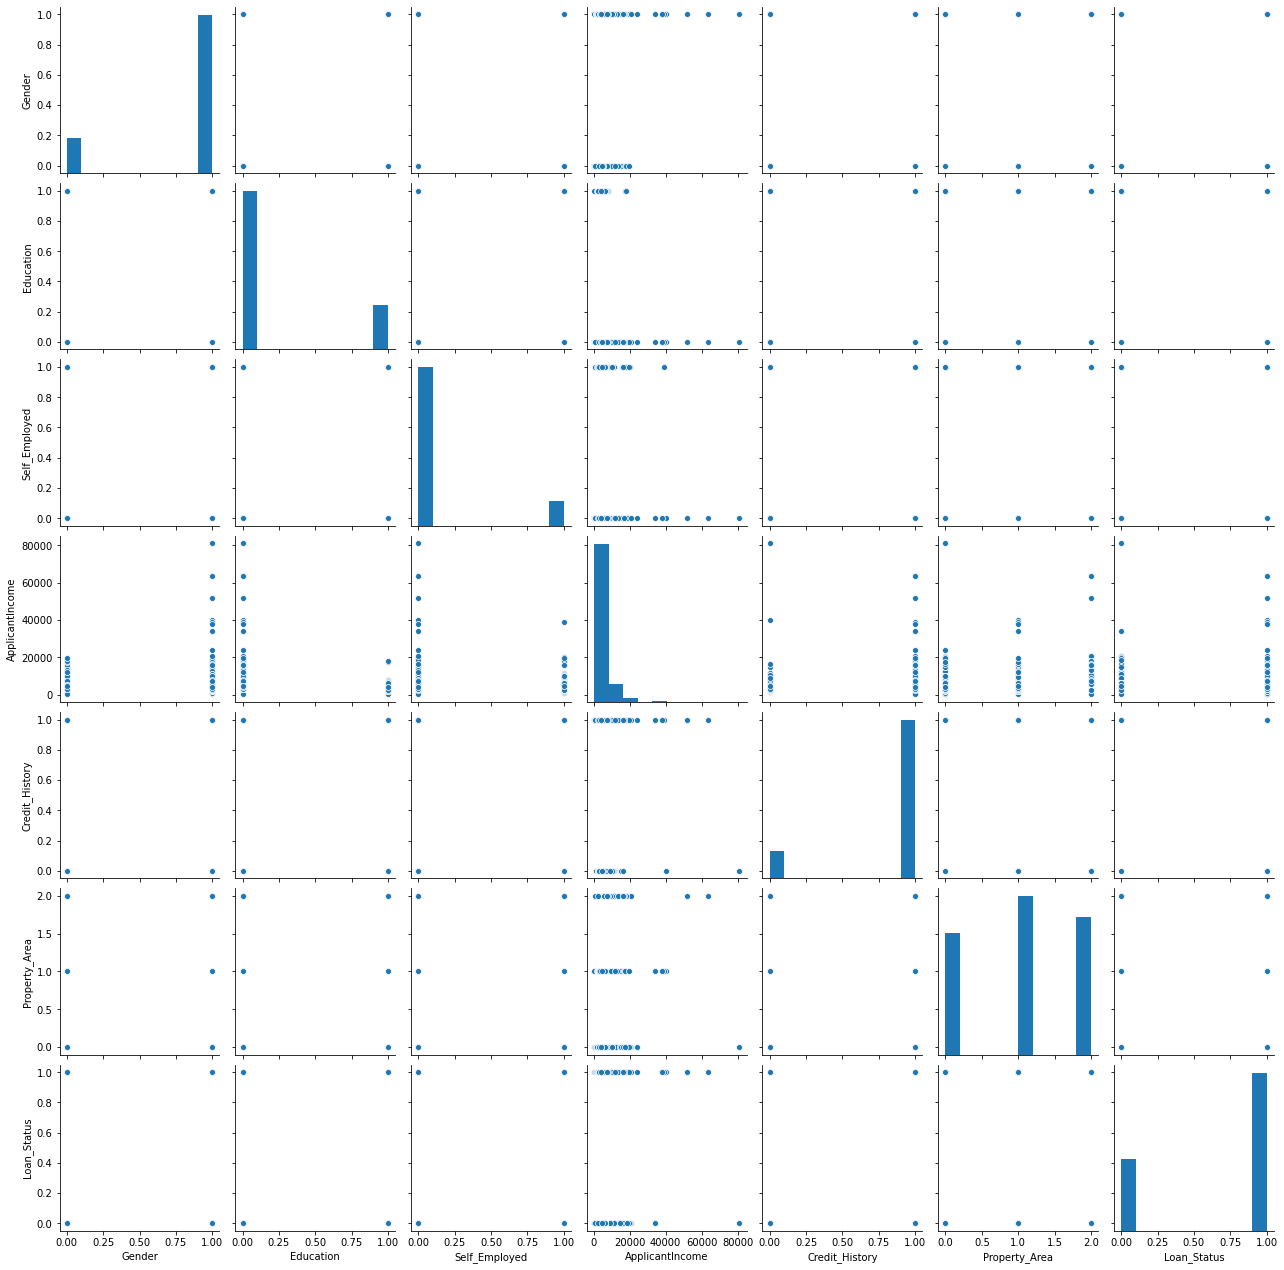

In [0]:
import seaborn as sns

sns.pairplot(data)

In [0]:
X_TRAIN = np.array(X_train).reshape(1,-1)
Y_TRAIN = np.array(y_train).reshape(1,-1)
X_TEST = np.array(X_test).reshape(1,-1)
Y_TEST = np.array(y_test).reshape(1,-1)

Y_TEST

array([[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])

In [0]:
''' SVM '''
from sklearn.svm import SVC

X_TRAIN = np.array(X_train).reshape(1,-1)
Y_TRAIN = np.array(y_train).reshape(-1,1)
X_TEST = np.array(X_test).reshape(-1,1)
Y_TEST = np.array(y_test).reshape(-1,1)

classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_TRAIN)
y_pred = classifier.predict(X_test)

print('Confusion Matrix\n {}\n\n'.format(confusion_matrix(Y_TEST,y_pred)))
print('Classification Report \n {}\n\n'.format(classification_report(Y_TEST,y_pred)))
print('SVC Accuracy - \t {}\n'.format(classifier.score(X_test, Y_TEST)))


Confusion Matrix
 [[19 20]
 [ 0 84]]


Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.49      0.66        39
           1       0.81      1.00      0.89        84

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



SVC Accuracy - 	 0.8373983739837398



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
classifier.predict(X_test) 

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
classifier.predict([[ 4.54299688e-01,  1.85024956e+00, -3.80160683e-01,
        -2.51883331e-01,  4.07763147e-01]])

array([1])

In [0]:
classifier.predict([[ 4.54299688e-01,  1.85024956e+00, -3.80160683e-01,
        -6.19638466e-01, -2.45240407e+00],])

array([0])

In [0]:
''' Random Forest Classifier '''
X_TRAIN = np.array(X_train).reshape(1,-1)
Y_TRAIN = np.array(y_train).reshape(-1,1)
X_TEST = np.array(X_test).reshape(-1,1)
Y_TEST = np.array(y_test).reshape(-1,1)

classifier = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=2, random_state=3)
classifier.fit(X_train, Y_TRAIN)
y_pred = classifier.predict(X_test)

print('Confusion Matrix\n {}\n\n'.format(confusion_matrix(Y_TEST,y_pred)))
print('Classification Report \n {}\n\n'.format(classification_report(Y_TEST,y_pred)))

print('Random Forest Accuracy - \t {}\n'.format(classifier.score(X_test, Y_TEST)))


Confusion Matrix
 [[19 20]
 [ 0 84]]


Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.49      0.66        39
           1       0.81      1.00      0.89        84

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



Random Forest Accuracy - 	 0.8373983739837398



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
